# 1. 线性回归

## 1.1 单变量线性回归
### 单变量线性回归公式
$$h_{w,b}(x)=b+wx$$
$w$和$b$是参数，为了方便运算，可以给$x$加上一个$x_0$
$$h_{w,b}(x)=bx_{0}+wx_{1}$$
### 损失函数
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}(h_{w,b}(x^{(i)})-y^{(i)})^{2}$$#
### 优化算法——梯度下降
$$w_j=w_{j}-\alpha\frac{\partial}{\partial{w_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})x^{(i)}}$$
$$b_j=b_{j}-\alpha\frac{\partial}{\partial{b_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})}$$

### python代码

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from utils import square_loss

读取数据集

In [24]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

查看数据集

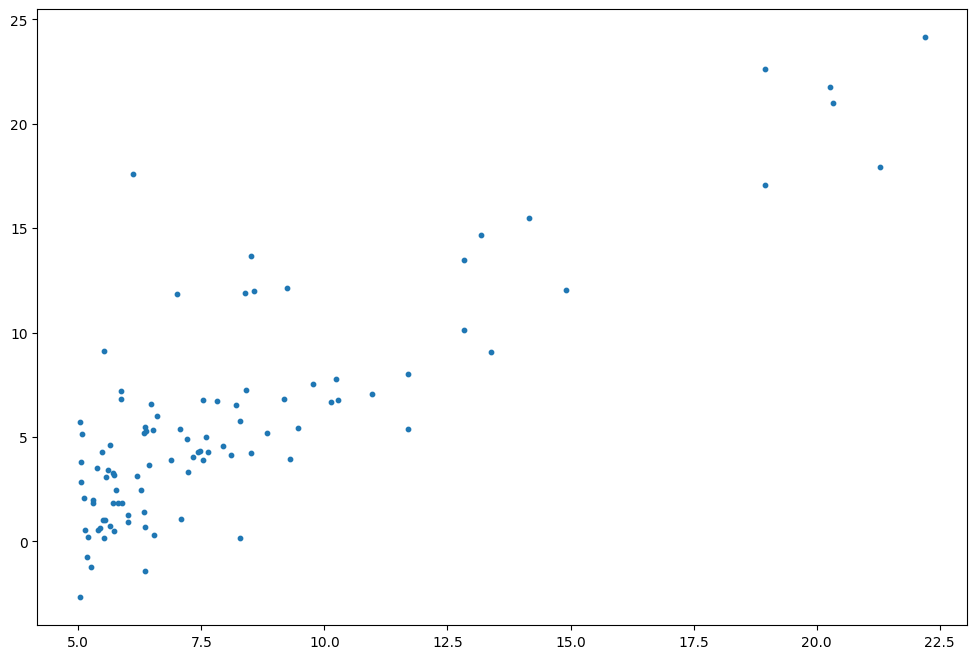

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=data[:, 0], y=data[:, 1], s=10)
plt.show()

分割训练集和验证集

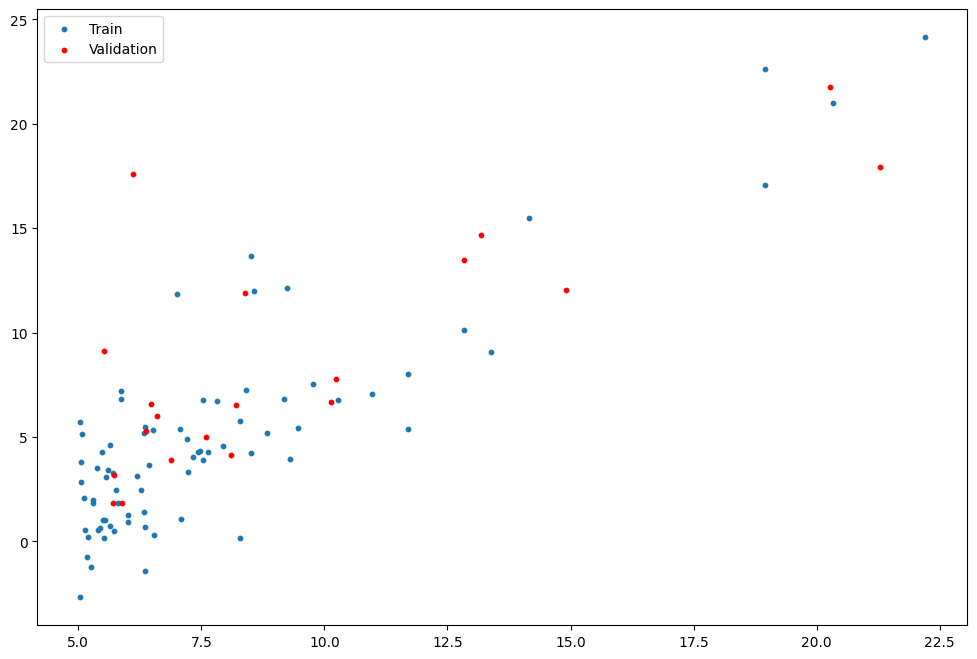

In [26]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, 0], data[:, 1], test_size=0.2)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x, y=train_y, s=10, label="Train")
ax.scatter(x=val_x, y=val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展维度，从长度为$n$的向量变成$n\times 1$的矩阵

In [27]:
train_x_ex = np.expand_dims(train_x,axis=1)
train_y_ex = np.expand_dims(train_y,axis=1)
val_x_ex = np.expand_dims(val_x,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

train_x_ex.shape

(77, 1)

调入线性回归类，获得参数矩阵和训练损失序列，记录训练时间

**运行速度：**
原版本：循环计算每一个参数，进行更新
```
error = pred - y
repeat{
    theta[0,i]=theta[0,i] - ((alpha / len(X)) * np.sum(np.multiply(error, x[:,i])))
}
```
改进后：使用numpy的矩阵运算，直接计算出$(d+1) \times (d+1)$的梯度矩阵，取对角线元素就是每个参数的梯度
```
error shape: (d+1, n)
error_1, error_2, ···, error_n
...
...
error_1, error_2, ···, error_n


theta = theta -  ((alpha / len(X)) * np.matmul(error, x).diagonal().T
```

In [35]:
from utils import LinearRegression

epochs = 500
alpha = 0.02
linear_reg = LinearRegression(x=train_x_ex,y=train_y_ex,lr=alpha,epoch=epochs)
start_time = time.time()
theta,loss = linear_reg.run()
end_time = time.time()

theta

Epoch: 1/1000, Train Loss: 26.1025
Epoch: 2/1000, Train Loss: 25.6508
Epoch: 3/1000, Train Loss: 25.2081
Epoch: 4/1000, Train Loss: 24.7742
Epoch: 5/1000, Train Loss: 24.3489
Epoch: 6/1000, Train Loss: 23.9321
Epoch: 7/1000, Train Loss: 23.5236
Epoch: 8/1000, Train Loss: 23.1232
Epoch: 9/1000, Train Loss: 22.7308
Epoch: 10/1000, Train Loss: 22.3462
Epoch: 11/1000, Train Loss: 21.9692
Epoch: 12/1000, Train Loss: 21.5998
Epoch: 13/1000, Train Loss: 21.2377
Epoch: 14/1000, Train Loss: 20.8828
Epoch: 15/1000, Train Loss: 20.5350
Epoch: 16/1000, Train Loss: 20.1941
Epoch: 17/1000, Train Loss: 19.8599
Epoch: 18/1000, Train Loss: 19.5325
Epoch: 19/1000, Train Loss: 19.2115
Epoch: 20/1000, Train Loss: 18.8969
Epoch: 21/1000, Train Loss: 18.5886
Epoch: 22/1000, Train Loss: 18.2865
Epoch: 23/1000, Train Loss: 17.9903
Epoch: 24/1000, Train Loss: 17.7000
Epoch: 25/1000, Train Loss: 17.4155
Epoch: 26/1000, Train Loss: 17.1367
Epoch: 27/1000, Train Loss: 16.8634
Epoch: 28/1000, Train Loss: 16.5956
E

array([[5.05265459, 4.45687324]])

In [ ]:
# val_x_ex

In [ ]:
#std = val_x_ex.std(axis=0)
#mean = val_x_ex.mean(axis=0)
#x = (val_x-mean)/std
#xx = x *std+mean
#xx

查看训练时间

In [29]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.0229s


计算在验证集上的损失

In [30]:
pred_val = linear_reg.prediction(val_x_ex)
loss_val_arr = square_loss(pred_val, val_y_ex)
loss_val = np.sum(loss_val_arr)/(2 * val_y_ex.shape[0])
print("Val Loss: {:.4f}".format(loss_val))

Val Loss: 13.8531


使用sklearn库函数进行验证

In [31]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sk_start_time = time.time()
sklearn_lr.fit(train_x_ex,train_y_ex)
sk_end_time = time.time()

sk_theta = [sklearn_lr.intercept_[0],sklearn_lr.coef_[0, 0]]
sk_lr_pred = sklearn_lr.predict(val_x_ex)
sk_loss_val_arr = square_loss(sk_lr_pred, val_y_ex)
sk_loss_val = np.sum(sk_loss_val_arr)/(2 * val_y_ex.shape[0])
print("Sklearn Val Loss: {:.4f}".format(sk_loss_val))
print("Sklearn Parameters: ", sklearn_lr.intercept_, sklearn_lr.coef_)
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))

Sklearn Val Loss: 9.0336
Sklearn Parameters:  [-4.75024638] [[1.25580692]]
Sklearn Train Time: 0.0010s


画出预测的直线

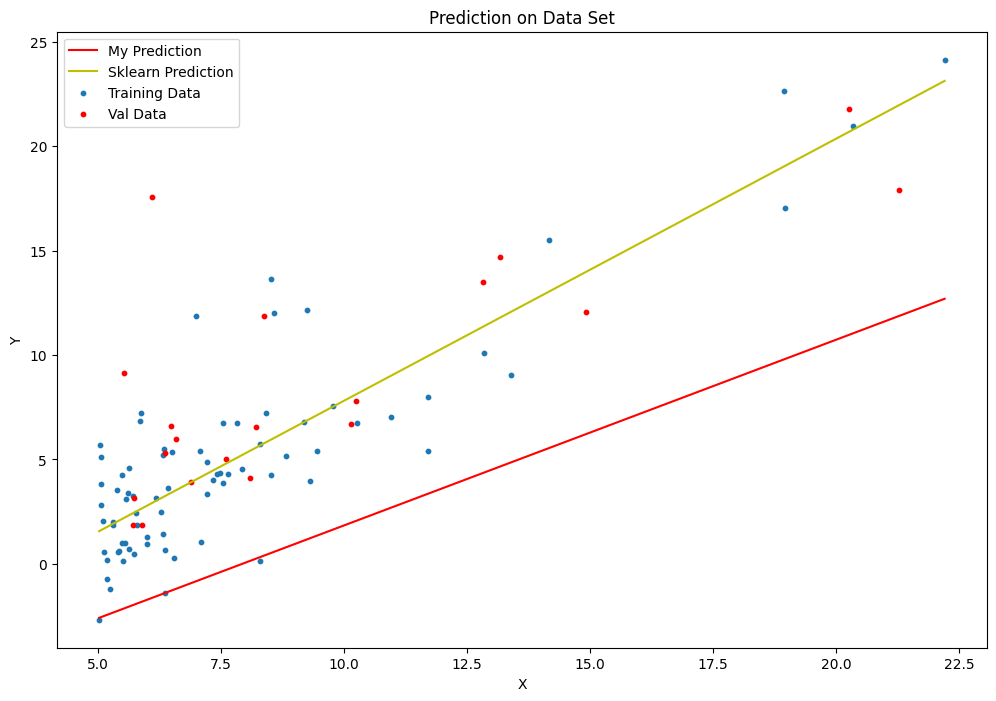

In [36]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
f1 = sk_theta[0] + (sk_theta[1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='My Prediction')
ax.plot(x, f1, 'y', label='Sklearn Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

画出训练损失曲线

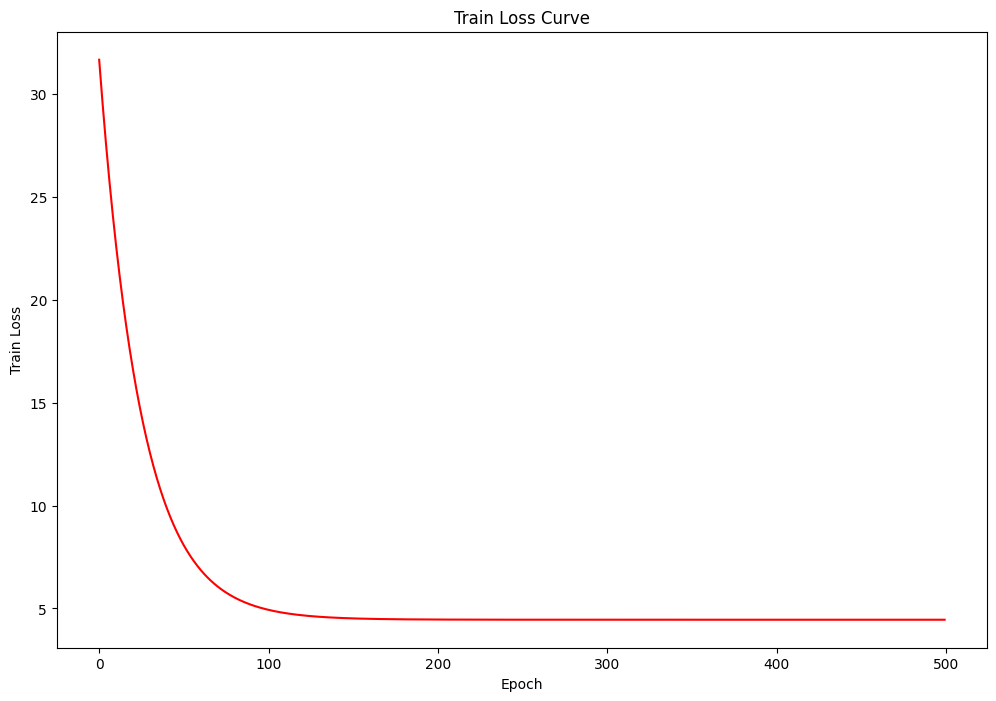

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()

## 多变量线性回归

加载数据集

In [14]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [ ]:
mean = data2.mean(axis=0)
std = data2.std(axis=0)
print(mean)
p
(data2-mean)/std

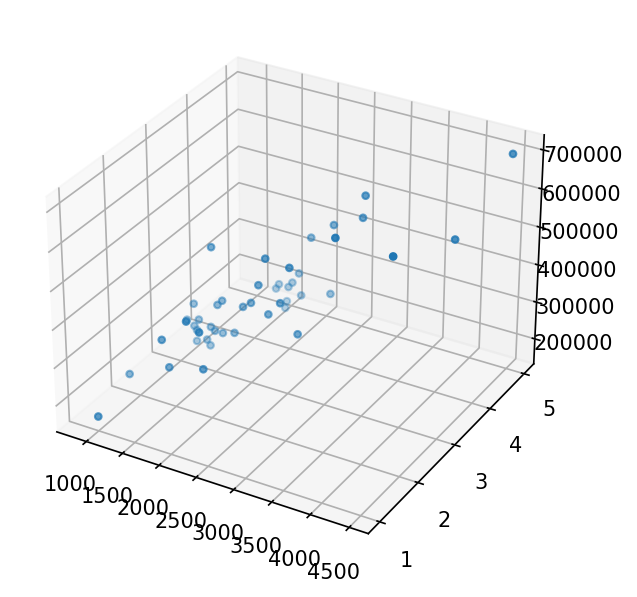

In [15]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0],data2[:,1],data2[:,2],s=10)
plt.show()

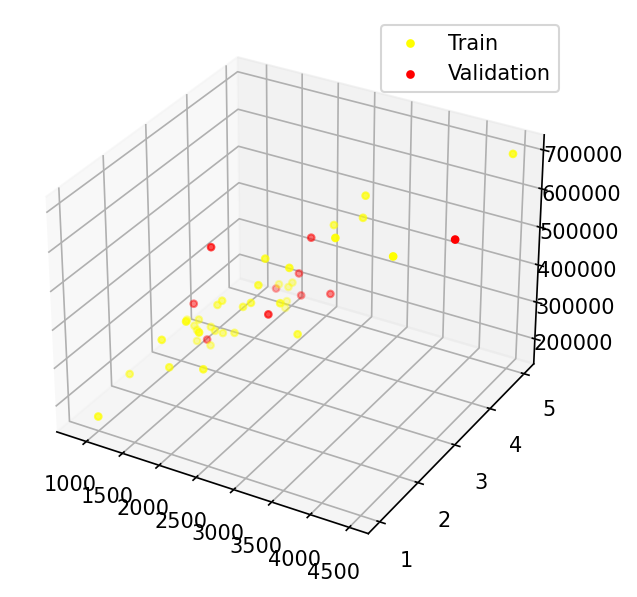

In [16]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data2[:, :2], data2[:, 2], test_size=0.2)
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

In [17]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

In [18]:
from utils import LinearRegression

alpha = 0.01
epochs = 1000
multi_lr = LinearRegression(train_x,train_y_ex,epoch=epochs,lr=alpha)
start_time = time.time()
theta, loss = multi_lr.run()
end_time = time.time()
theta

Epoch: 1/100000, Train Loss: 65150357324.4189
Epoch: 2/100000, Train Loss: 63845923115.6867
Epoch: 3/100000, Train Loss: 62569054091.3485
Epoch: 4/100000, Train Loss: 61319147830.0365
Epoch: 5/100000, Train Loss: 60095615606.4532
Epoch: 6/100000, Train Loss: 58897882065.4674
Epoch: 7/100000, Train Loss: 57725384904.3552
Epoch: 8/100000, Train Loss: 56577574562.9731
Epoch: 9/100000, Train Loss: 55453913921.6546
Epoch: 10/100000, Train Loss: 54353878006.6292
Epoch: 11/100000, Train Loss: 53276953702.7658
Epoch: 12/100000, Train Loss: 52222639473.4511
Epoch: 13/100000, Train Loss: 51190445087.4150
Epoch: 14/100000, Train Loss: 50179891352.3232
Epoch: 15/100000, Train Loss: 49190509854.9613
Epoch: 16/100000, Train Loss: 48221842707.8379
Epoch: 17/100000, Train Loss: 47273442302.0415
Epoch: 18/100000, Train Loss: 46344871066.1875
Epoch: 19/100000, Train Loss: 45435701231.2998
Epoch: 20/100000, Train Loss: 44545514601.4714
Epoch: 21/100000, Train Loss: 43673902330.1565
Epoch: 22/100000, Trai

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch: 92201/100000, Train Loss: 1462565132.8831
Epoch: 92202/100000, Train Loss: 1462565132.8831
Epoch: 92203/100000, Train Loss: 1462565132.8831
Epoch: 92204/100000, Train Loss: 1462565132.8831
Epoch: 92205/100000, Train Loss: 1462565132.8831
Epoch: 92206/100000, Train Loss: 1462565132.8831
Epoch: 92207/100000, Train Loss: 1462565132.8831
Epoch: 92208/100000, Train Loss: 1462565132.8831
Epoch: 92209/100000, Train Loss: 1462565132.8831
Epoch: 92210/100000, Train Loss: 1462565132.8831
Epoch: 92211/100000, Train Loss: 1462565132.8831
Epoch: 92212/100000, Train Loss: 1462565132.8831
Epoch: 92213/100000, Train Loss: 1462565132.8831
Epoch: 92214/100000, Train Loss: 1462565132.8831
Epoch: 92215/100000, Train Loss: 1462565132.8831
Epoch: 92216/100000, Train Loss: 1462565132.8831
Epoch: 92217/100000, Train Loss: 1462565132.8831
Epoch: 92218/100000, Train Loss: 1462565132.8831
Epoch: 92219/100000, Train Loss: 1462565132.8831
Epoch: 92220/100000, Train Loss: 1462565132.8831
Epoch: 92221/100000,

array([[336843.10810811, 121922.6656908 ,  -7295.94423782]])

In [19]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 3.8461s


In [20]:
pred = multi_lr.prediction(val_x)
print(pred)
print(val_y_ex)
multi_loss_arr = square_loss(pred, val_y_ex)
multi_loss = np.sum(multi_loss_arr) / (2 * pred.shape[0])
print("Val Loss: {:.4f}".format(multi_loss))

[[333249.75014918]
 [359584.91759228]
 [230406.42870477]
 [354026.70990032]
 [394225.61028839]
 [280404.0046952 ]
 [328733.0197685 ]
 [642344.66586719]
 [242149.92769455]
 [203306.04642068]]
[[287000.]
 [329900.]
 [212000.]
 [449900.]
 [314000.]
 [285900.]
 [345000.]
 [549000.]
 [464500.]
 [299000.]]
Val Loss: 4329590065.0825


In [21]:
from sklearn.linear_model import LinearRegression
sk_multi_lr = LinearRegression()
sk_start_time = time.time()
sk_multi_lr.fit(train_x,train_y_ex)
sk_end_time = time.time()

sk_lr_pred = sk_multi_lr.predict(val_x)
sk_loss_arr = square_loss(sk_lr_pred, val_y_ex)
sk_loss = np.sum(sk_loss_arr) / (2 * pred.shape[0])

sk_theta = np.array([[sk_multi_lr.intercept_[0],sk_multi_lr.coef_[0,0],sk_multi_lr.coef_[0,1]]])
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("Sklearn parameters: ", sk_multi_lr.intercept_, sk_multi_lr.coef_)

Sklearn Train Time: 0.0020s
Sklearn Val Loss: 4653182154.5658
Sklearn parameters:  [57263.45622955] [[  157.31594034 -9485.07393893]]


[[  336843.10810811   329547.16387029   322251.21963247 ...
   -370863.48296006  -378159.42719788  -385455.37143569]
 [  458765.77379891   451469.82956109   444173.88532327 ...
   -248940.81726926  -256236.76150708  -263532.70574489]
 [  580688.43948971   573392.49525189   566096.55101407 ...
   -127018.15157846  -134314.09581628  -141610.04005409]
 ...
 [12163341.68011578 12156045.73587796 12148749.79164015 ...
  11455635.08904761 11448339.1448098  11441043.20057198]
 [12285264.34580658 12277968.40156876 12270672.45733095 ...
  11577557.75473841 11570261.8105006  11562965.86626278]
 [12407187.01149738 12399891.06725956 12392595.12302175 ...
  11699480.42042921 11692184.4761914  11684888.53195358]]
[[181811.56346115 181428.32815049 181045.09283982 ... 144637.73832674
  144254.50301608 143871.26770542]
 [187573.45840738 187190.22309671 186806.98778605 ... 150399.63327297
  150016.39796231 149633.16265164]
 [193335.35335361 192952.11804294 192568.88273228 ... 156161.5282192
  155778.2929

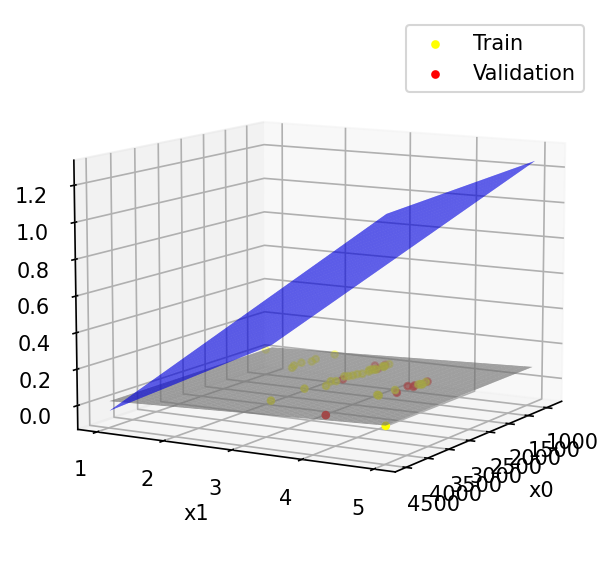

In [22]:
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
x = np.linspace(data2[:,0].min(), data2[:,0].max(), num=100)
y = np.linspace(data2[:,1].min(), data2[:,1].max(), num=100)

xx, yy = np.meshgrid(x, y)

z1 = np.zeros((100, 100))
z2 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i,j] = theta[0,0] + theta[0,1] * x[i] + theta[0,2] * y[j]
        z2[i,j] = sk_theta[0,0] + sk_theta[0,1] * x[i] + sk_theta[0,2] * y[j]

ax.plot_surface(xx,yy,z1,alpha=0.8, rstride=3, cstride=1, color="blue")
ax.plot_surface(xx,yy,z2,alpha=0.8, rstride=3, cstride=1, color="gray")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.view_init(elev=10, azim=30)
plt.legend()
plt.show()

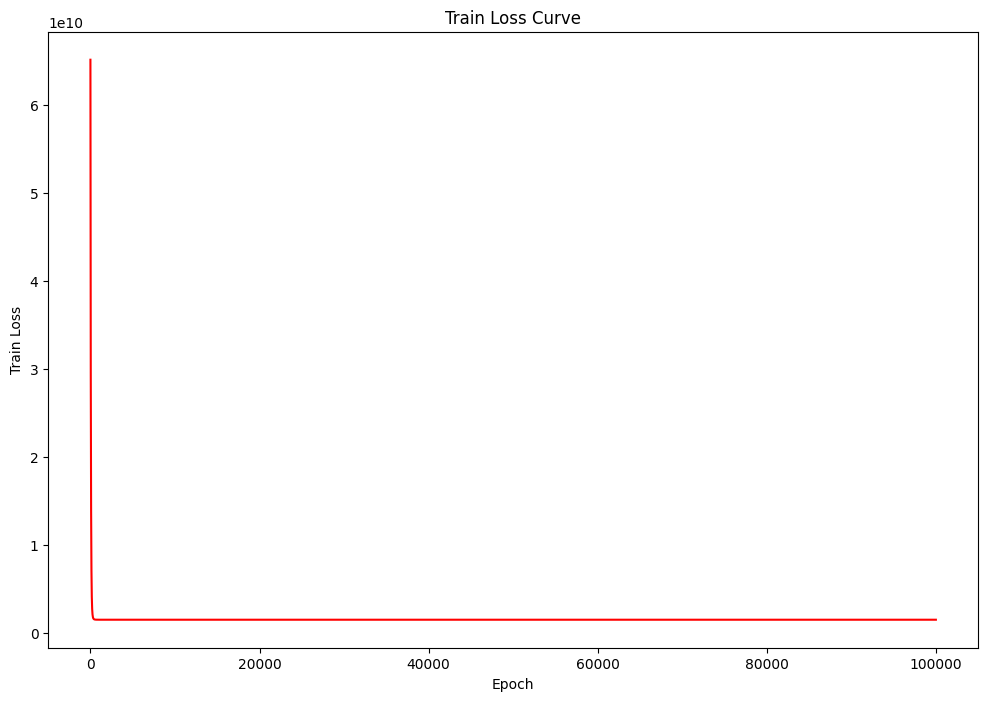

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()